In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt

# Veriyi yükle
data = pd.read_csv("Stress.csv")

df = pd.read_csv('Stress.csv')

# İlk 5 satırı görüntüle
data.head()
#veri setindeki eksikleri gösterir
df.isnull().sum()



,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up ""feelings of doom"" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid ""are you psychic"" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my ""doom"" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs.",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)","My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don't like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe? Then yesterday I decided to take my friend to go help another ""friend"" move to a new place. While we were driving the friend we are moving strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things, then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and the friend we are moving in the backseat is like ""you have to understand I was just trying to get your attention"" you know the thing 5 year olds do to get peoples attention by smacking them, this guy is in his 60's.",1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, he is kind, he is sweet, he is a good student, he likes the same things as me, my family likes him, and so on... but i dont feel that passion that rush i felt with my ex, the truth is that when i started going out with my boyfriend i secretly saw my ex a few times to see if i really didnt feel nothing for him, but it was disgusting, i didnt even want him to touch me, i feel bad with myself i didnt want him, but still, i was there. then i kinda realized i felt nothing love related for him and it was ok, HE was HURT when he knew i was dating this boy and he even begged me to stay but of course not. but now the problem is that when im with my boyfriend i dont feel like i love him, like that thing you kinda have to feel with a new love, i just feel ""ok"" with him, and i catch myself thinking about my ex from time to time, remembering all the good things we had and it drives me crazy because i know that if i see him again i wont feel that way, that ""love"" that my mind makes me think stills there. and recently i found out that he has a girl and he is actually enjoying the experience and i got so mad and so hurt (i know i dont have any right to feel that way) i felt betrayed and I STILL feel that way, i gross myself out.",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]","October is Domestic Violence Awareness Month and I am a domestic violence survivor who is still struggling, even after over four years. Lately I have been feeling very angry. Angry that my abusive ex received no real consequences for his actions. This man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. I was granted a restraining order against him (and it was

In [60]:
print(f"Veri setinde {df.shape[0]} örnek ve {df.shape[1]} öznitelik bulunmaktadır.")

#veri setindeki özniteliklerin isimlerini ve veri tiplerini kontrol edebiliriz
df.info()

#veri setindeki sayısal özniteliklerin dağılımını inceleyebiliriz. Bunun için, öncelikle veri setindeki özniteliklerin istatistiksel özetine bakalım
print(df.describe())



Veri setinde 2838 örnek ve 9 öznitelik bulunmaktadır.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   subreddit         2838 non-null   object        
 1   post_id           2838 non-null   object        
 2   sentence_range    2838 non-null   object        
 3   text              2838 non-null   object        
 4   label             2838 non-null   int64         
 5   confidence        2838 non-null   float64       
 6   social_timestamp  2838 non-null   datetime64[ns]
 7   datetime          2838 non-null   datetime64[ns]
 8   stress_level      2838 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 199.7+ KB
             label   confidence               social_timestamp   
count  2838.000000  2838.000000                           2838  \
mean      0.524313     0.808972

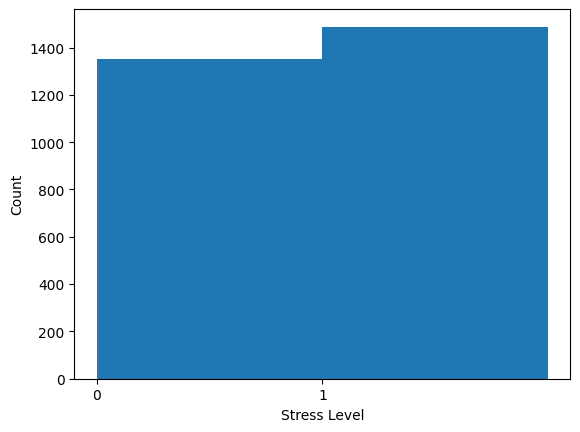

In [62]:

#Öncelikle veri setindeki stres düzeyine göre örnek sayılarına bakalım.
plt.hist(df['label'], bins=[0, 1, 2])
plt.xticks([0, 1])
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()


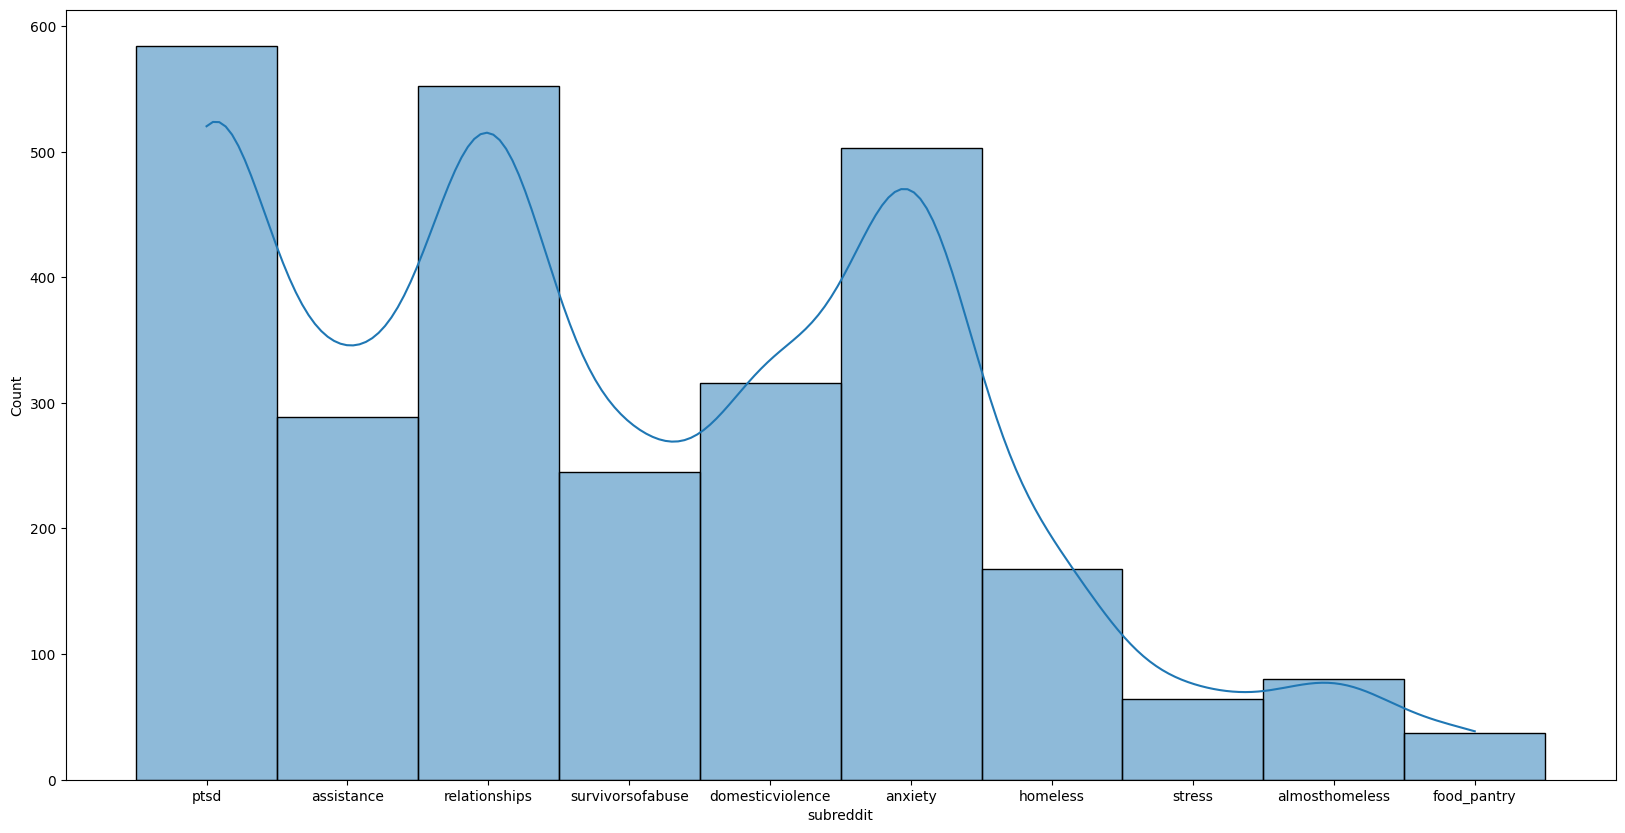

In [41]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="subreddit", bins=10, kde=True)
plt.show()


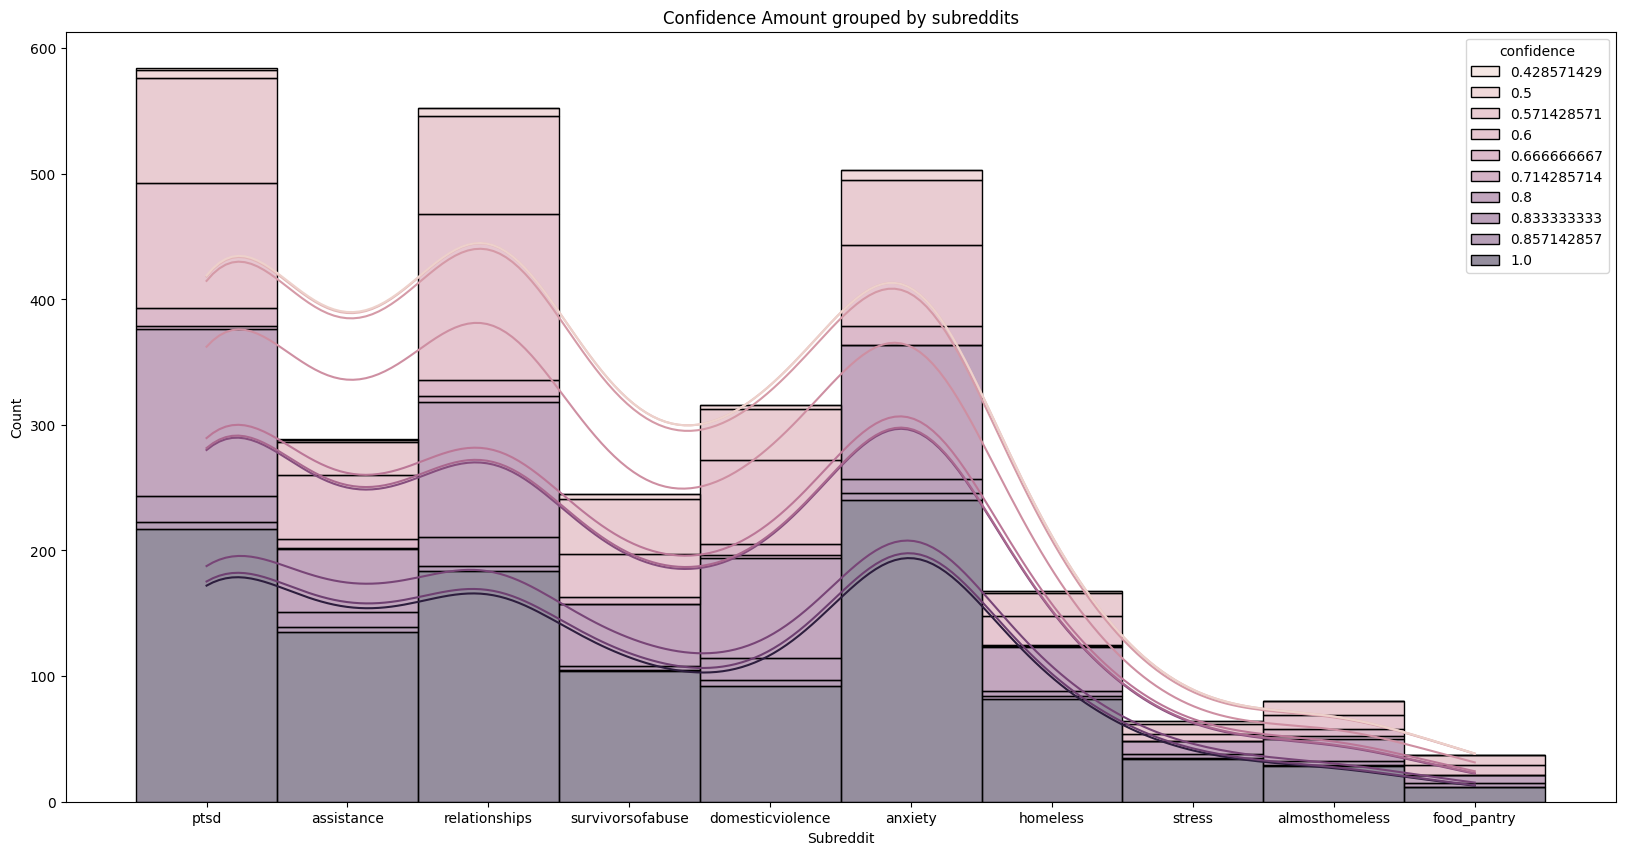

In [57]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="subreddit", hue="confidence", multiple="stack", bins=10, kde=True)
plt.xlabel('Subreddit')
plt.title('Confidence Amount grouped by subreddits')
plt.show()


In [43]:
df['social_timestamp'] = pd.to_datetime(df['social_timestamp'], unit='s')


In [51]:


start_date = datetime.datetime(2020, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2020, 1, 31, 23, 59, 59)

mask = (df['social_timestamp'] >= start_date) & (df['social_timestamp'] <= end_date)
stressed_days = df.loc[mask, 'label'].sum()
df['datetime'] = pd.to_datetime(df['social_timestamp'], unit='s')
df['datetime'] = pd.to_datetime(df['social_timestamp'], unit='ms')



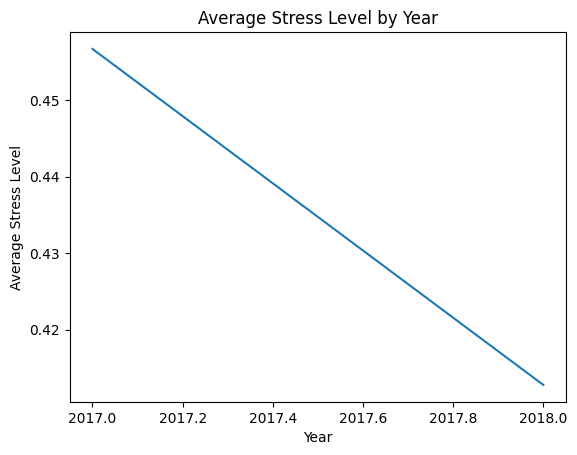

In [54]:
df['stress_level'] = df['label'] * df['confidence']
yearly_stress = df.groupby(df['datetime'].dt.year)['stress_level'].mean()

plt.plot(yearly_stress.index, yearly_stress.values)
plt.xlabel('Year')
plt.ylabel('Average Stress Level')
plt.title('Average Stress Level by Year')
plt.show()
